In [1]:
from matplotlib.image import imread

In [2]:
img = imread("../tom_2.jpg")

In [3]:
print(img.shape)

(428, 800, 3)


In [4]:
print(img)

[[[ 27 137  42]
  [ 27 137  42]
  [ 28 138  43]
  ...
  [  2   3   3]
  [  2   3   3]
  [  2   3   3]]

 [[ 27 137  42]
  [ 27 137  42]
  [ 28 138  43]
  ...
  [  2   3   3]
  [  2   3   3]
  [  2   3   3]]

 [[ 27 137  42]
  [ 27 137  42]
  [ 28 138  43]
  ...
  [  2   3   3]
  [  2   3   3]
  [  2   3   3]]

 ...

 [[ 14  82  21]
  [ 14  82  21]
  [ 14  82  21]
  ...
  [  7  61  16]
  [  7  61  16]
  [  7  61  16]]

 [[ 14  82  21]
  [ 14  82  21]
  [ 14  82  21]
  ...
  [  7  61  16]
  [  7  61  16]
  [  7  61  16]]

 [[ 14  82  21]
  [ 14  82  21]
  [ 14  82  21]
  ...
  [  7  61  16]
  [  7  61  16]
  [  6  60  15]]]


In [5]:
print(img[1,1,:])

[ 27 137  42]


In [6]:
from matplotlib import pyplot as plt

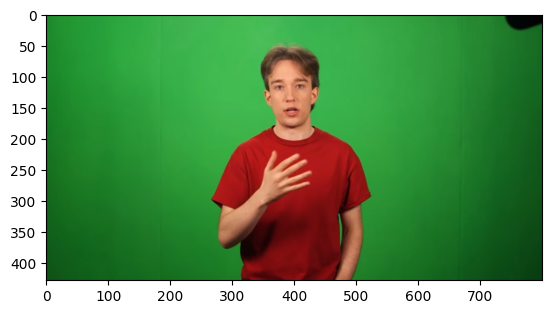

In [7]:
plt.imshow(img)

# clustering

In [11]:
data = img.reshape([img.shape[0]*img.shape[1],3]).copy()

In [12]:
data.shape

(342400, 3)

In [13]:
y_s = np.array(range(img.shape[1]))
x_s = np.array([0]*img.shape[1])

In [14]:
y_ss = y_s.copy()
for i in range(1,img.shape[0]):
    y_ss = np.hstack([y_s,y_ss])

In [15]:
y_ss = y_ss.reshape([y_ss.shape[0],1])

In [16]:
y_ss.shape

(342400, 1)

In [17]:
y_ss[:10,:]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [18]:
x_ss = x_s
for i in range(1,img.shape[0]):
    x_ss = np.hstack([x_ss,np.array([i]*img.shape[1])])

In [19]:
x_ss = x_ss.reshape([x_ss.shape[0],1])

In [20]:
x_ss[:10,:]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [21]:
third_column = data[:,2].T
third_column = third_column.reshape(third_column.shape[0] , 1)

In [22]:
third_column.shape,x_ss.shape,y_ss.shape

((342400, 1), (342400, 1), (342400, 1))

In [23]:
result = np.hstack([third_column,x_ss,y_ss])

In [24]:
result.shape

(342400, 3)

In [25]:
data[:,:2].shape

(342400, 2)

In [26]:
data = np.hstack([data[:,:2],result])

In [27]:
data.shape

(342400, 5)

In [28]:
data[:10,:]

array([[ 27, 137,  42,   0,   0],
       [ 27, 137,  42,   0,   1],
       [ 28, 138,  43,   0,   2],
       [ 28, 138,  43,   0,   3],
       [ 28, 138,  43,   0,   4],
       [ 28, 138,  43,   0,   5],
       [ 29, 139,  44,   0,   6],
       [ 29, 139,  44,   0,   7],
       [ 30, 140,  45,   0,   8],
       [ 30, 140,  45,   0,   9]])

In [29]:
import pandas as pd
import random as rd

In [30]:
df = pd.DataFrame(data = data,columns=["r","g","b","x","y"])

In [31]:
df.shape

(342400, 5)

In [32]:
df.head(4)

,r,g,b,x,y
0,27,137,42,0,0
1,27,137,42,0,1
2,28,138,43,0,2
3,28,138,43,0,3


In [33]:
for i in range(100): # just making sure that data is correct
    random_num = rd.randint(0,img.shape[0]*img.shape[1]-1)
    x = df.iloc[random_num][-2]
    y = df.iloc[random_num][-1]
    if img[x,y,:][0] != df.iloc[random_num][0] or\
    img[x,y,:][1] != df.iloc[random_num][1] or img[x,y,:][2] != df.iloc[random_num][2]:
        print("error")

In [34]:
from sklearn.cluster import KMeans

In [35]:
kmeans = KMeans(n_clusters=2 , n_init=30)

In [36]:
kmeans.fit(df[df.columns[:3]])

KMeans(n_clusters=2, n_init=30)

In [37]:
df["label"] = kmeans.labels_

In [38]:
df.head(5)

,r,g,b,x,y,label
0,27,137,42,0,0,0
1,27,137,42,0,1,0
2,28,138,43,0,2,0
3,28,138,43,0,3,0
4,28,138,43,0,4,0


In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=2)

In [41]:
res = pca.fit_transform(df[df.columns[:3]])

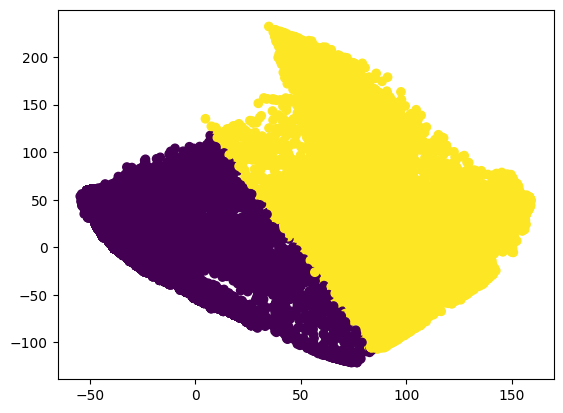

In [42]:
plt.scatter(res[:,0],res[:,1],c=df["label"])

In [43]:
not_img_class =  df.iloc[df.shape[0]//2][-1] 

In [44]:
data = df.to_numpy()

In [45]:
data.shape

(342400, 6)

In [46]:
for i in range(data.shape[0]):
    if data[i,5] == not_img_class:
        data[i,:3] = np.array([255,255,255])

In [47]:
data[:10,:]

array([[255, 255, 255,   0,   0,   0],
       [255, 255, 255,   0,   1,   0],
       [255, 255, 255,   0,   2,   0],
       [255, 255, 255,   0,   3,   0],
       [255, 255, 255,   0,   4,   0],
       [255, 255, 255,   0,   5,   0],
       [255, 255, 255,   0,   6,   0],
       [255, 255, 255,   0,   7,   0],
       [255, 255, 255,   0,   8,   0],
       [255, 255, 255,   0,   9,   0]])

In [48]:
data = data[:,:3]

In [49]:
data.shape

(342400, 3)

In [50]:
data[:5,:]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]])

In [51]:
data = data.reshape([img.shape[0],img.shape[1],3])

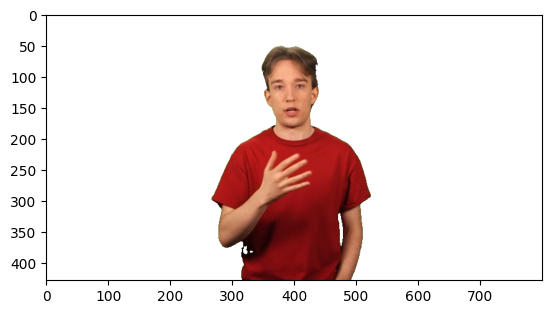

In [52]:
plt.imshow(data)